## K-Nearest Neighbors(KNN)

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.

It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.


### How KNN works-

<img src="images/knn2.jpg" width="80%"/>

<img src="images/ED.jpg" width="60%"/>

## K-NN steps

<img src="images/knn_steps.PNG"/>

### Digit Recognition

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

### Features

In [2]:
X_new = digits.data

In [3]:
X_new.ndim

2

### Labels

In [4]:
y = digits.target

### Visualize Data

In [10]:
import numpy as np
import matplotlib.pyplot as plt

4


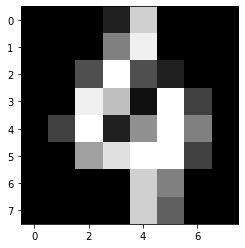

In [14]:
print(y[100])
plt.imshow(X_new[100].reshape(8,8),cmap="gray")

### Split Data

In [17]:
X_new.shape, y.shape

((1797, 64), (1797,))

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,y, test_size=.20,random_state=0)

In [20]:
xtrain.shape, xtest.shape

((1437, 64), (360, 64))

### Train model using KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
kn = KNeighborsClassifier(n_neighbors=20)

In [23]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=20)

### Make Prediction

In [25]:
prediction = kn.predict(xtest)

In [27]:
prediction[0]

2

2


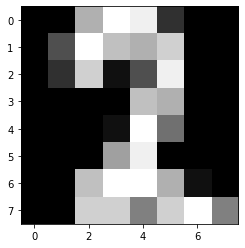

In [34]:
print(ytest[0])
plt.imshow(xtest[0].reshape(8,8), cmap="gray")

### Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score

In [38]:
tp = kn.predict(xtrain)
print("Testing Score: ", accuracy_score(ytest,prediction))
print("Training Score: ", accuracy_score(ytrain,tp))

Testing Score:  0.9638888888888889
Training Score:  0.9770354906054279


In [39]:
np.where(ytest!=prediction)

(array([ 66, 115, 117, 122, 124, 130, 158, 167, 169, 181, 246, 312, 315],
       dtype=int64),)

In [47]:
import pandas as pd
df = pd.DataFrame()
df['Actual']=ytest
df['Prediction']=prediction
df[df['Actual']!=df['Prediction']]

Actual  Prediction
66        2           7
115       9           7
117       2           0
122       8           3
124       8           1
130       9           5
158       8           7
167       8           1
169       8           3
181       5           9
246       8           1
312       9           5
315       4           7

### Examining KNN Model

In [51]:
xtest[0].ndim

1

In [56]:
kn.predict(xtest[0].reshape(1,-1))

array([2])

In [71]:
nb=kn.kneighbors(xtest[0].reshape(1,-1), n_neighbors=4)

In [72]:
# for i in nb[1][0]:
#     print(y[i])
nb

(array([[17.29161647, 20.174241  , 21.        , 21.61018278]]),
 array([[ 533, 1278,   46, 1042]], dtype=int64))

In [73]:
kn.predict_proba(X_new[144].reshape(1,-1))

array([[0.  , 0.15, 0.  , 0.  , 0.85, 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [74]:
y[144]

4

### Check for different n neighbours

In [88]:
error_rate=[]
accuracy=[]
for n in range(1,15):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(xtrain,ytrain)
    print("For n={}".format(n))
    print("Training Score: ", clf.score(xtrain,ytrain))
    print("Testing Score: ", clf.score(xtest,ytest))
    print("Error: ", 1-score)
    pred = clf.predict(xtest)
    score = accuracy_score(ytest,pred)
    accuracy.append(score)
    error_rate.append(1-score)
    print()

For n=1
Training Score:  1.0
Testing Score:  0.9888888888888889
Error:  0.030555555555555558

For n=2
Training Score:  0.9895615866388309
Testing Score:  0.9805555555555555
Error:  0.011111111111111072

For n=3
Training Score:  0.9909533750869868
Testing Score:  0.9833333333333333
Error:  0.019444444444444486

For n=4
Training Score:  0.9916492693110647
Testing Score:  0.975
Error:  0.01666666666666672

For n=5
Training Score:  0.9902574808629089
Testing Score:  0.975
Error:  0.025000000000000022

For n=6
Training Score:  0.9902574808629089
Testing Score:  0.9722222222222222
Error:  0.025000000000000022

For n=7
Training Score:  0.9909533750869868
Testing Score:  0.975
Error:  0.02777777777777779

For n=8
Training Score:  0.9895615866388309
Testing Score:  0.975
Error:  0.025000000000000022

For n=9
Training Score:  0.9874739039665971
Testing Score:  0.975
Error:  0.025000000000000022

For n=10
Training Score:  0.9860821155184412
Testing Score:  0.9722222222222222
Error:  0.02500000000

### Visualize error rate by changing neighbours

Text(0.5, 1.0, 'Error rate as per neighbour')

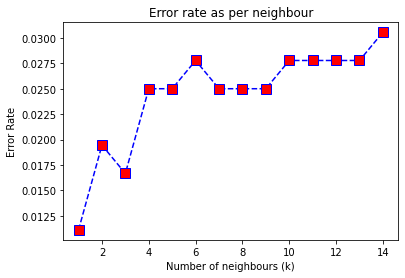

In [89]:
plt.plot(range(1,15),error_rate,color="blue",linestyle="dashed",marker="s",
        markerfacecolor="red", markersize="10")
# plt.plot(range(1,15),accuracy,color="blue",linestyle="dashed",marker="s",
#         markerfacecolor="green", markersize="10")
plt.xlabel("Number of neighbours (k)")
plt.ylabel("Error Rate")
plt.title("Error rate as per neighbour")

### Check model on real dataset

In [90]:
!pip install opencv-python

In [91]:
import cv2

In [115]:
img=cv2.imread("test.png",2)

In [116]:
img.ndim

2

In [117]:
img.shape

(232, 160)

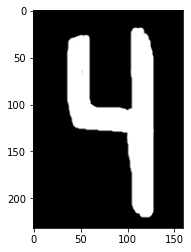

In [118]:
plt.imshow(img,cmap="gray")

(8, 8)


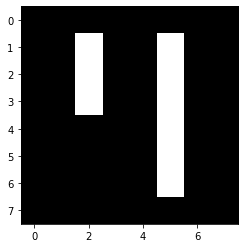

In [119]:
converted_img = cv2.resize(img,(8,8))
print(converted_img.shape)
plt.imshow(converted_img,cmap="gray")

In [120]:
kn.predict(converted_img.reshape(1,-1))

array([9])

In [121]:
from sklearn.datasets import load_diabetes

In [122]:
data = load_diabetes()

In [123]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [127]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df["target"]=data.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0